In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1337)

In [2]:
dataset = "./data/mushrooms.csv"

data = pd.read_csv(dataset)  # read DataSet

print("DataSet Size : {}".format(data.shape))
data.head(5)  # top 5 contents

DataSet Size : (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
p = data.loc[data['class'] == 'p']
e = data.loc[data['class'] == 'e']

print("poison : {} edible : {}".format(len(p), len(e)))

poison : 3916 edible : 4208


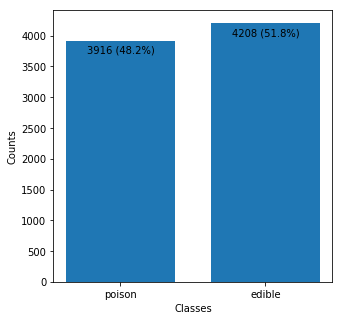

In [4]:
def draw_bar(p, e, name):
    classes = ['poison', 'edible']
    counts = [len(p), len(e)]

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)

    rects = plt.bar(np.arange(2), counts, align='center', width=.75)
    plt.xticks(np.arange(2), classes)

    for i, rect in enumerate(rects):
        ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(counts[i]) + " ({:.1f}%)".format(counts[i] / 8124 * 100), ha='center')

    plt.xlabel(name)
    plt.ylabel('Counts')

draw_bar(p, e, "Classes")

In [5]:
res = data.isin(['?']).any()
res.loc[res == True]

stalk-root    True
dtype: bool

In [6]:
print(len(data.loc[data['stalk-root'] == '?']))
data.drop('stalk-shape', axis=1, inplace=True)  # drop stalk-shape

2480


In [7]:
n = 5
top_p = p.sample(n)
top_e = e.sample(n)

In [8]:
top_p

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4487,p,x,y,g,f,f,f,c,b,p,...,k,p,p,p,w,o,l,h,v,d
5575,p,x,s,b,t,f,f,c,b,h,...,s,w,w,p,w,o,p,h,v,g
6462,p,f,y,e,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
7065,p,x,y,n,f,m,a,c,b,w,...,y,c,c,p,w,n,n,w,c,d
5981,p,f,s,w,t,f,f,c,b,w,...,s,w,w,p,w,o,p,h,s,u


In [9]:
top_e

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2523,e,x,y,n,t,n,f,c,b,n,...,s,g,w,p,w,o,p,k,y,d
7744,e,k,f,w,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g
1849,e,x,f,n,t,n,f,c,b,w,...,s,g,w,p,w,o,p,k,v,d
3517,e,f,y,n,t,n,f,c,b,u,...,s,g,w,p,w,o,p,k,y,d
3260,e,f,y,g,t,n,f,c,b,p,...,s,g,p,p,w,o,p,k,y,d


In [10]:
import docx

def pd_to_docx(df, name):
    doc = docx.Document()

    t = doc.add_table(df.shape[0] + 1, df.shape[1])

    for j in range(df.shape[-1]):
        t.cell(0, j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i + 1, j).text = str(df.values[i,j])

    doc.save(name)

# pd_to_docx(top_e, './top-%d-edible-table.docx' % n)
# pd_to_docx(top_p, './top-%d-poison-table.docx' % n)

In [11]:
# Data Labeling
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


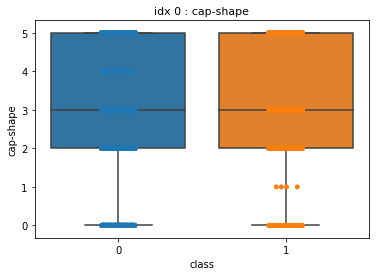

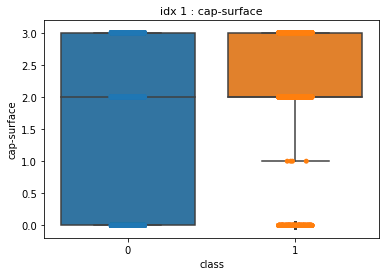

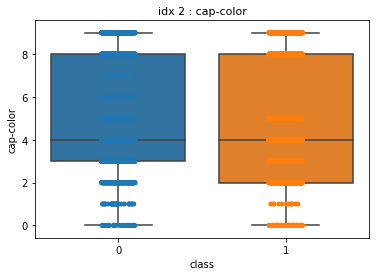

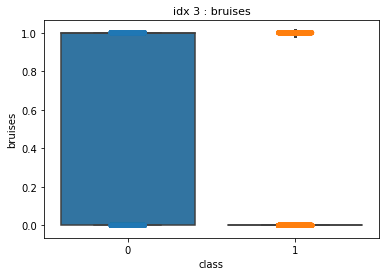

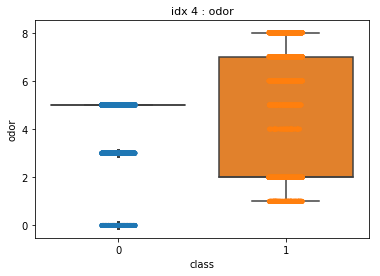

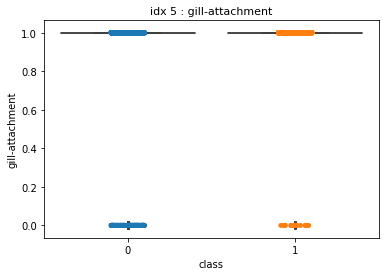

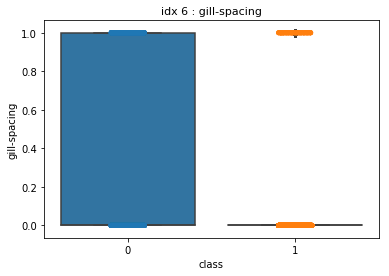

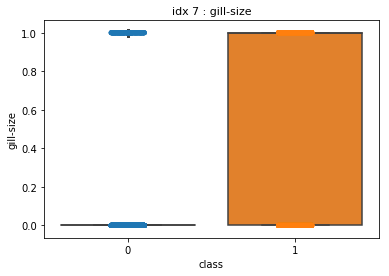

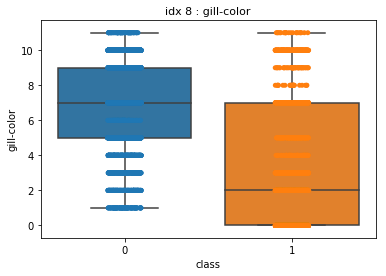

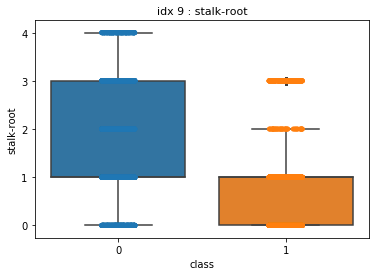

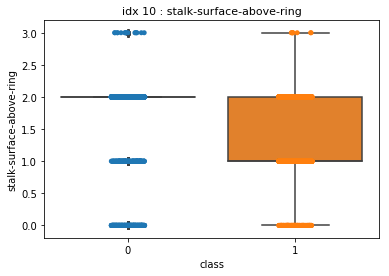

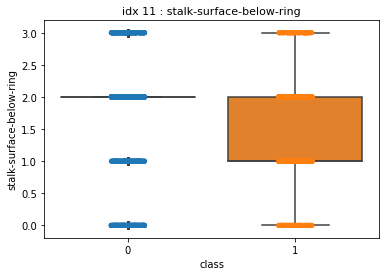

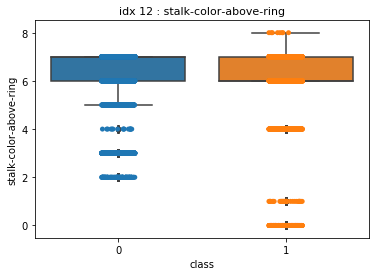

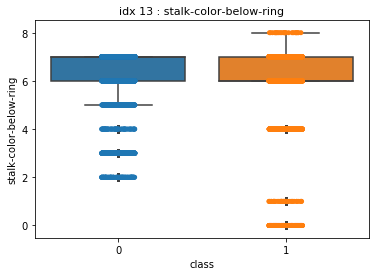

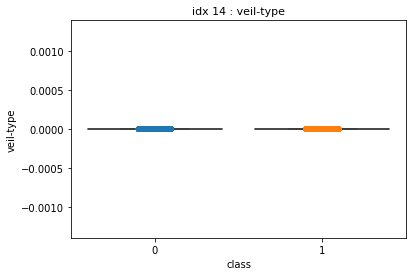

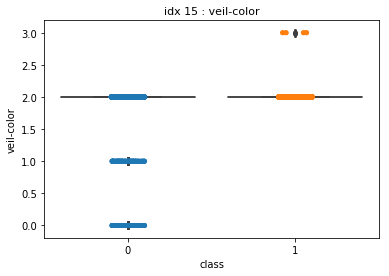

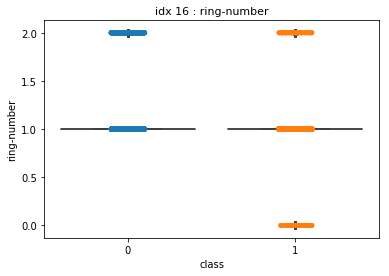

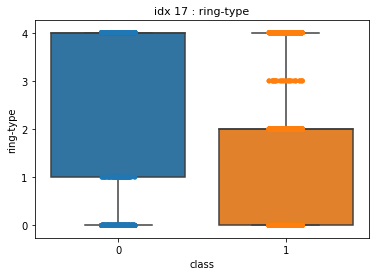

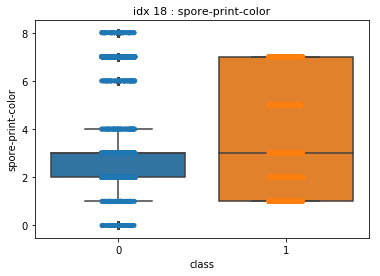

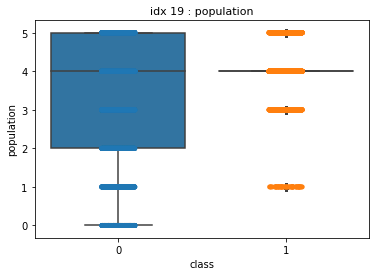

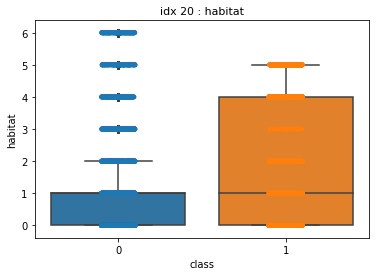

In [12]:
import seaborn as sns


def boxplot(name="", title=""):
    global data
    ax = sns.boxplot(x='class', y=name, data=data)
    ax = sns.stripplot(x="class", y=name, data=data, jitter=True, edgecolor="gray")
    
    plt.title(title, fontsize=11)
    plt.show()


for idx, col in enumerate(data.columns[1:]):
    boxplot(name=col, title="idx %d : %s" % (idx, col))

In [13]:
## Data State
train_y = data['class']
data = data.drop(['class'], axis=1)
train_x = data

print(train_y.shape, train_x.shape)

(8124,) (8124, 21)


In [14]:
train_x.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-root,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,1.109798,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,1.061106,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,4.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [15]:
# Data Normalize

from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler 

scalers = {"Standard": StandardScaler(), "Robust": RobustScaler(),
           "MaxAbs": MaxAbsScaler(), "MinMax": MinMaxScaler()}

x_scaled = []
for _, v in scalers.items():
    x_scaled.append(v.fit_transform(train_x))

x_scaled.append(train_x)  # not nomalized data

In [16]:
# Feature Engineering

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

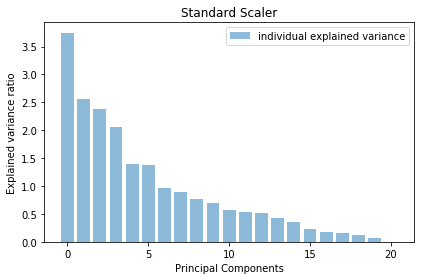

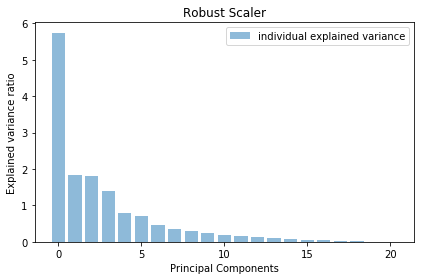

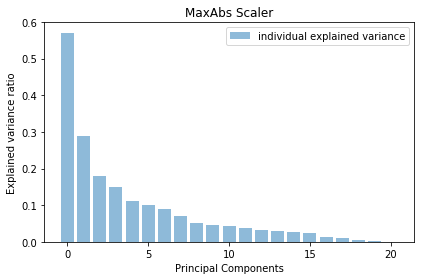

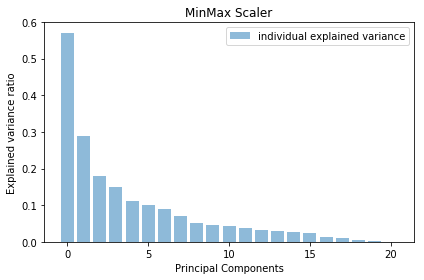

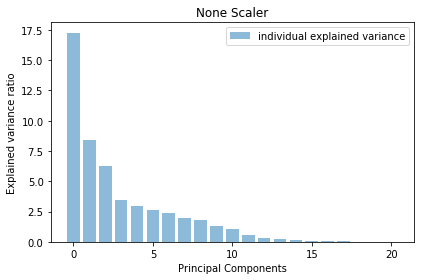

In [17]:
# 1. PCA
for idx, x in enumerate(x_scaled):
    pca = PCA()
    pca.fit_transform(x)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(21), pca.explained_variance_, alpha=0.5,
            align='center', label='individual explained variance')
    
    plt.title('%s Scaler' % (list(scalers.keys())[idx] if not idx == 4 else "None"))
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

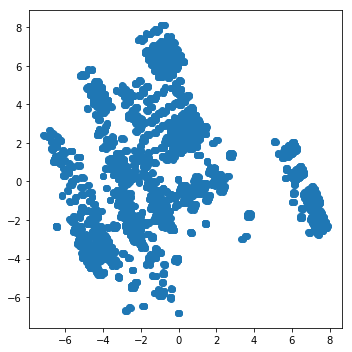

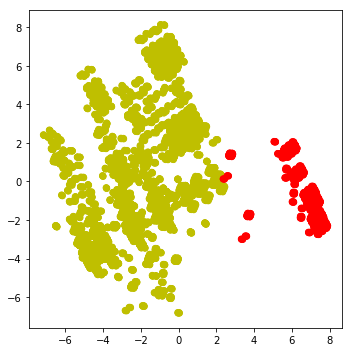

In [18]:
# 1-1. PCA visualize with k-mean cluserting (only 2 features)
pca = PCA(n_components=2)
x = pca.fit_transform(data.values)
plt.figure(figsize=(5, 5))
plt.scatter(x[:,0], x[:,1])  # by class
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
X_clustered = kmeans.fit_predict(data.values)

LABEL_COLOR_MAP = {0 : 'r', 1 : 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize=(5, 5))
plt.scatter(x[:,0], x[:,1], c=label_color)  # by class
plt.tight_layout()
plt.show()
